In [ ]:
import os
train_dir = "/content/drive/MyDrive/DNP_Dataset/train/"
test_dir = "/content/drive/MyDrive/DNP_Dataset/test/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['Blank', 'Not_Blank'], dtype='<U9')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  # Setup target folder
  target_folder = target_dir + target_class

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img
  

Image Shape: (1536, 2048, 3)


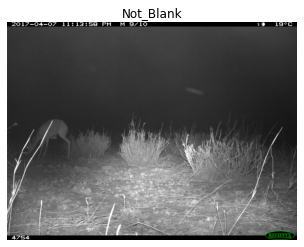

In [ ]:
img = view_random_image(target_dir = train_dir,
                        target_class = "Not_Blank")

## Pre-processing the data 
* Turning them into batches and resizing them

In [ ]:
import tensorflow as tf


In [ ]:
len(os.listdir("/content/drive/MyDrive/DNP_Dataset/train/Blank")) + len(os.listdir("/content/drive/MyDrive/DNP_Dataset/train/Not_Blank"))

5527

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size = (224,224),
                                                                 batch_size = 32,
                                                                 label_mode = "binary")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=(224,224),
                                                                batch_size = 32,
                                                                label_mode = "binary",
                                                                shuffle = False)


Found 5527 files belonging to 2 classes.
Found 1979 files belonging to 2 classes.


## Create a model from scratch

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation 

## <b>Base Model to check the performance

In [ ]:
# Create a model
model = Sequential([
  Conv2D(100, 3, input_shape = (224,224,3), activation="relu"),
  Conv2D(100, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model

model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 100)     90100     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 100)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 100)     90100     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 100)     90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 100)      0         
 2D)                                                    

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                           patience = 6)

In [ ]:
history = model.fit(train_data,
                    epochs = 50,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data),
                    callbacks=[early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 100s 1s/step - loss: 2.1644 - accuracy: 0.7811 - val_loss: 0.4655 - val_accuracy: 0.8159
Epoch 2/50
89/89 [==============================] - 99s 1s/step - loss: 0.3088 - accuracy: 0.8583 - val_loss: 0.4352 - val_accuracy: 0.8108
Epoch 3/50
89/89 [==============================] - 100s 1s/step - loss: 0.3302 - accuracy: 0.8689 - val_loss: 0.3959 - val_accuracy: 0.8100
Epoch 4/50
89/89 [==============================] - 99s 1s/step - loss: 0.2406 - accuracy: 0.8854 - val_loss: 1.1565 - val_accuracy: 0.7533
Epoch 5/50
89/89 [==============================] - 99s 1s/step - loss: 0.1613 - accuracy: 0.9351 - val_loss: 0.9740 - val_accuracy: 0.7791
Epoch 6/50
89/89 [==============================] - 99s 1s/step - loss: 0.1056 - accuracy: 0.9584 - val_loss: 0.9569 - val_accuracy: 0.7717
Epoch 7/50
89/89 [==============================] - 99s 1s/step - loss: 0.0935 - accuracy: 0.9623 - val_loss: 1.7437 - val_accuracy: 0.7180


## <b> Model_1 : Increasing the number of layers

In [ ]:
# Create a model
model_1 = Sequential([
  Conv2D(100, 3, input_shape = (224,224,3), activation="relu"),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  Conv2D(100, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model

model_1.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
                    epochs = 50,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data),
                    callbacks=[early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 162s 2s/step - loss: 0.6407 - accuracy: 0.7836 - val_loss: 0.4372 - val_accuracy: 0.7850
Epoch 2/50
89/89 [==============================] - 150s 2s/step - loss: 0.2929 - accuracy: 0.8562 - val_loss: 0.4518 - val_accuracy: 0.7747
Epoch 3/50
89/89 [==============================] - 149s 2s/step - loss: 0.4911 - accuracy: 0.8132 - val_loss: 0.6863 - val_accuracy: 0.7165
Epoch 4/50
89/89 [==============================] - 149s 2s/step - loss: 0.2571 - accuracy: 0.8802 - val_loss: 1.0555 - val_accuracy: 0.7651
Epoch 5/50
89/89 [==============================] - 149s 2s/step - loss: 0.1657 - accuracy: 0.9320 - val_loss: 1.2869 - val_accuracy: 0.7592
Epoch 6/50
89/89 [==============================] - 149s 2s/step - loss: 0.1536 - accuracy: 0.9337 - val_loss: 2.0921 - val_accuracy: 0.7290
Epoch 7/50
89/89 [==============================] - 148s 2s/step - loss: 0.1538 - accuracy: 0.9351 - val_loss: 4.7259 - val_accuracy: 0.6171


## <b> Model_2 : Same as `Model_1`. Just reduces the number of filters from 100 to 50

In [ ]:
model_2 = Sequential([
  Conv2D(50, 3, input_shape = (224,224,3), activation="relu"),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_2 = model_2.fit(train_data,
                        epochs = 50,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks=[early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 399s 4s/step - loss: 0.5741 - accuracy: 0.8040 - val_loss: 0.8577 - val_accuracy: 0.7150
Epoch 2/50
89/89 [==============================] - 92s 992ms/step - loss: 0.3537 - accuracy: 0.8410 - val_loss: 0.6575 - val_accuracy: 0.7261
Epoch 3/50
89/89 [==============================] - 91s 987ms/step - loss: 0.2118 - accuracy: 0.9041 - val_loss: 1.6054 - val_accuracy: 0.7084
Epoch 4/50
89/89 [==============================] - 91s 987ms/step - loss: 0.1710 - accuracy: 0.9299 - val_loss: 1.5121 - val_accuracy: 0.7113
Epoch 5/50
89/89 [==============================] - 91s 986ms/step - loss: 0.1124 - accuracy: 0.9552 - val_loss: 1.8774 - val_accuracy: 0.7106
Epoch 6/50
89/89 [==============================] - 91s 986ms/step - loss: 0.1136 - accuracy: 0.9577 - val_loss: 2.1869 - val_accuracy: 0.6856
Epoch 7/50
89/89 [==============================] - 91s 990ms/step - loss: 0.1094 - accuracy: 0.9598 - val_loss: 1.9836 - val_accuracy: 0.6929
E

### <b> The Model is still overfitting and the val_accuracy is decreasing after every epoch
<br>

## <b> Model_4 : Reducing the filters from 50 to 10. Same architecture as `Model_1` and `Model_2`

In [ ]:
model_4 = Sequential([
  Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_26 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_28 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer = "adam",
                metrics=["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
            epochs = 50,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks=[early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 67s 704ms/step - loss: 0.0538 - accuracy: 0.9810 - val_loss: 1.8766 - val_accuracy: 0.7990
Epoch 2/50
89/89 [==============================] - 60s 641ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 2.0983 - val_accuracy: 0.8122
Epoch 3/50
89/89 [==============================] - 59s 623ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 2.2145 - val_accuracy: 0.8071
Epoch 4/50
89/89 [==============================] - 58s 620ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 2.9660 - val_accuracy: 0.7747
Epoch 5/50
89/89 [==============================] - 58s 620ms/step - loss: 0.0307 - accuracy: 0.9880 - val_loss: 1.8444 - val_accuracy: 0.8122
Epoch 6/50
89/89 [==============================] - 58s 615ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 2.5379 - val_accuracy: 0.7533
Epoch 7/50
89/89 [==============================] - 58s 618ms/step - loss: 0.0563 - accuracy: 0.9813 - val_loss: 1.6190 - val_accuracy: 0.7798

In [ ]:
from tensorflow.keras.layers import Dropout

## <b> Model_5 : Adding Dropout Layer to after every 2nd layer of `Model_4` to get more regularized model 

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, input_shape = (224,224,3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dropout(0.2),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dropout(0.2),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dropout(0.2),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
          epochs = 50,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data),
          callbacks = [early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 62s 647ms/step - loss: 0.6411 - accuracy: 0.7934 - val_loss: 0.3577 - val_accuracy: 0.8778
Epoch 2/50
89/89 [==============================] - 59s 630ms/step - loss: 0.2297 - accuracy: 0.8886 - val_loss: 0.5814 - val_accuracy: 0.8027
Epoch 3/50
89/89 [==============================] - 59s 628ms/step - loss: 0.1671 - accuracy: 0.9200 - val_loss: 0.5224 - val_accuracy: 0.8439
Epoch 4/50
89/89 [==============================] - 59s 632ms/step - loss: 0.1247 - accuracy: 0.9450 - val_loss: 1.0072 - val_accuracy: 0.7784
Epoch 5/50
89/89 [==============================] - 60s 634ms/step - loss: 0.1054 - accuracy: 0.9566 - val_loss: 0.5750 - val_accuracy: 0.8328
Epoch 6/50
89/89 [==============================] - 60s 632ms/step - loss: 0.0885 - accuracy: 0.9637 - val_loss: 0.8297 - val_accuracy: 0.8115
Epoch 7/50
89/89 [==============================] - 59s 630ms/step - loss: 0.0903 - accuracy: 0.9655 - val_loss: 1.1020 - val_accuracy: 0.7563

## <b> Model_6 : Same as `Model_5`. Just increased the learning rate by 10x.

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, input_shape = (224,224,3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dropout(0.2),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dropout(0.2),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Dropout(0.2),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.1),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_6 = model_6.fit(train_data,
          epochs = 50,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data),
          callbacks = [early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 61s 637ms/step - loss: 2271.3826 - accuracy: 0.7779 - val_loss: 0.4845 - val_accuracy: 0.8137
Epoch 2/50
89/89 [==============================] - 59s 631ms/step - loss: 0.5177 - accuracy: 0.7878 - val_loss: 0.4828 - val_accuracy: 0.8137
Epoch 3/50
89/89 [==============================] - 60s 640ms/step - loss: 0.5184 - accuracy: 0.7878 - val_loss: 0.4832 - val_accuracy: 0.8137
Epoch 4/50
89/89 [==============================] - 60s 633ms/step - loss: 0.5176 - accuracy: 0.7878 - val_loss: 0.4826 - val_accuracy: 0.8137
Epoch 5/50
89/89 [==============================] - 59s 624ms/step - loss: 0.5189 - accuracy: 0.7878 - val_loss: 0.4835 - val_accuracy: 0.8137
Epoch 6/50
89/89 [==============================] - 59s 631ms/step - loss: 0.5177 - accuracy: 0.7878 - val_loss: 0.4837 - val_accuracy: 0.8137
Epoch 7/50
89/89 [==============================] - 59s 626ms/step - loss: 0.5180 - accuracy: 0.7878 - val_loss: 0.4877 - val_accuracy: 0.8

-----------------------------------------------------------------------------
## <b> The model is no more overfitting and the val_accuracy is not decreasing after every epoch 
-----------------------------------------------------------------------------

## <b> Model_7 : Removed the Dropout layer and added a Dense Layer from `Model_6` to see what happens

In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
  Conv2D(10, 3, activation= "relu"),
  Dense(10, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation= "relu"),
  Conv2D(10, 3, activation= "relu"),
  Dense(10, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])


In [ ]:
model_7.compile(loss="binary_crossentropy",
                optimizer = "adam",
                metrics=["accuracy"])

In [ ]:
history_7 = model_7.fit(train_data,
                        epochs = 50,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks=[early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 64s 666ms/step - loss: 1.0383 - accuracy: 0.7973 - val_loss: 0.4468 - val_accuracy: 0.8041
Epoch 2/50
89/89 [==============================] - 61s 644ms/step - loss: 0.2244 - accuracy: 0.8883 - val_loss: 0.4497 - val_accuracy: 0.8166
Epoch 3/50
89/89 [==============================] - 62s 659ms/step - loss: 0.1412 - accuracy: 0.9397 - val_loss: 0.6963 - val_accuracy: 0.7857
Epoch 4/50
89/89 [==============================] - 60s 637ms/step - loss: 0.0960 - accuracy: 0.9626 - val_loss: 0.7774 - val_accuracy: 0.8189
Epoch 5/50
89/89 [==============================] - 60s 643ms/step - loss: 0.0767 - accuracy: 0.9662 - val_loss: 1.1509 - val_accuracy: 0.8211
Epoch 6/50
89/89 [==============================] - 60s 641ms/step - loss: 0.0929 - accuracy: 0.9662 - val_loss: 1.3238 - val_accuracy: 0.7261
Epoch 7/50
89/89 [==============================] - 62s 662ms/step - loss: 0.0663 - accuracy: 0.9785 - val_loss: 1.2210 - val_accuracy: 0.8100

## <b> Model_7 is overfitting again.

* DROPOUT LAYER IS IMPORTANT

## <b> Model_8 : Adding Dropout layers to 2nd Conv2D and Dense layers of `Model_7` and increasing the learning rate by 10x.

In [ ]:
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
  Conv2D(10, 3, activation= "relu"),
  Dropout(0.2),
  Dense(10, activation="relu"),
  Dropout(0.2),
  MaxPool2D(),
  Conv2D(10, 3, activation= "relu"),
  Conv2D(10, 3, activation= "relu"),
  Dropout(0.2),
  Dense(10, activation="relu"),
  Dropout(0.2),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.1),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_8 = model_8.fit(train_data,
                        epochs = 50,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks=[early_stopping_callback])

Epoch 1/50
89/89 [==============================] - 63s 655ms/step - loss: 15452.5029 - accuracy: 0.7716 - val_loss: 0.4858 - val_accuracy: 0.8137
Epoch 2/50
89/89 [==============================] - 60s 642ms/step - loss: 0.5176 - accuracy: 0.7878 - val_loss: 0.4870 - val_accuracy: 0.8137
Epoch 3/50
89/89 [==============================] - 60s 638ms/step - loss: 0.5175 - accuracy: 0.7878 - val_loss: 0.4821 - val_accuracy: 0.8137
Epoch 4/50
89/89 [==============================] - 60s 636ms/step - loss: 0.5178 - accuracy: 0.7878 - val_loss: 0.4859 - val_accuracy: 0.8137
Epoch 5/50
89/89 [==============================] - 60s 638ms/step - loss: 0.5176 - accuracy: 0.7878 - val_loss: 0.4847 - val_accuracy: 0.8137
Epoch 6/50
89/89 [==============================] - 59s 632ms/step - loss: 0.5173 - accuracy: 0.7878 - val_loss: 0.4844 - val_accuracy: 0.8137
Epoch 7/50
89/89 [==============================] - 60s 634ms/step - loss: 0.5182 - accuracy: 0.7878 - val_loss: 0.4843 - val_accuracy: 0.

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_48 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 dropout_6 (Dropout)         (None, 220, 220, 10)      0         
                                                                 
 dense_10 (Dense)            (None, 220, 220, 10)      110       
                                                                 
 dropout_7 (Dropout)         (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                      

# <b> Transfer Learning (Traing the dataset on EfficientNet Model)

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
# Setup the Base Model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture
inputs = layers.Input(shape=(224,224,3), name="input_shape")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="Global_Average_Pooling")(x)
outputs = layers.Dense(1, activation="sigmoid", name="Output_Layer")(x)
transfer_model_1 = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
transfer_model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_Average_Pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 Output_Layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
transfer_model_1.compile(loss="binary_crossentropy",
                         optimizer = "adam",
                         metrics=["accuracy"])

In [ ]:
# Save checkpoint

checkpoint_path = "drive/MyDrive/DNP_Dataset/5000_images_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = False,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [ ]:
transfer_history_1 = transfer_model_1.fit(train_data,
                                          epochs = 50,
                                          steps_per_epoch = len(train_data),
                                          validation_data = test_data,
                                          validation_steps = len(test_data),
                                          callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/50
173/173 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9322
Epoch 1: saving model to drive/MyDrive/DNP_Dataset/5000_images_model_checkpoints_weights/checkpoint.ckpt
INFO:tensorflow:Assets written to: drive/MyDrive/DNP_Dataset/5000_images_model_checkpoints_weights/checkpoint.ckpt/assets
173/173 [==============================] - 1211s 7s/step - loss: 0.1926 - accuracy: 0.9322 - val_loss: 0.1751 - val_accuracy: 0.8994
Epoch 2/50
173/173 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9653
Epoch 2: saving model to drive/MyDrive/DNP_Dataset/5000_images_model_checkpoints_weights/checkpoint.ckpt
INFO:tensorflow:Assets written to: drive/MyDrive/DNP_Dataset/5000_images_model_checkpoints_weights/checkpoint.ckpt/assets
173/173 [==============================] - 155s 876ms/step - loss: 0.0981 - accuracy: 0.9653 - val_loss: 0.1632 - val_accuracy: 0.9060
Epoch 3/50
173/173 [==============================] - ETA: 0s - loss: 0.0827 - accurac

In [ ]:
# Plot the validation and training curves
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot Loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

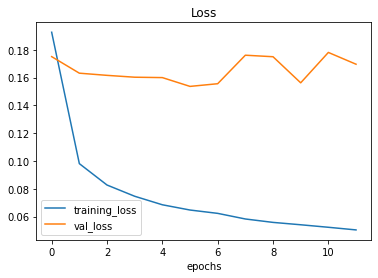

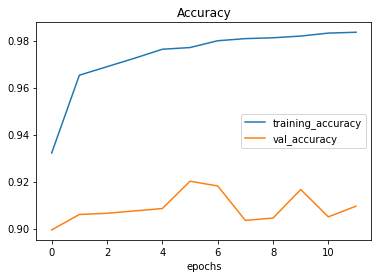

In [ ]:
plot_loss_curves(transfer_history_1)

### Evaluating the model

In [ ]:
transfer_model_1.evaluate(test_data)

43/43 [==============================] - 20s 458ms/step - loss: 0.1179 - accuracy: 0.9551


[0.11789450794458389, 0.9550809860229492]

In [ ]:
pred_probs = transfer_model_1.predict(test_data, verbose=1)

62/62 [==============================] - 34s 501ms/step


In [ ]:
pred_probs

array([[1.3676996e-03],
       [3.9793266e-04],
       [9.8090430e-05],
       ...,
       [9.7699273e-01],
       [8.4088929e-02],
       [8.4769779e-01]], dtype=float32)

In [ ]:
pred_classes = np.round(pred_probs)

In [ ]:
len(pred_classes)

1979

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  label = labels.numpy()
  y_labels.append(int(label[0]))

In [ ]:
y_labels = np.array(y_labels)

In [ ]:
y_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true = y_labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      1425
         1.0       0.78      0.94      0.85       554

    accuracy                           0.91      1979
   macro avg       0.88      0.92      0.89      1979
weighted avg       0.92      0.91      0.91      1979



In [ ]:
from tensorflow import keras

In [ ]:
prev_model = model = keras.models.load_model('/content/drive/MyDrive/DNP_Dataset/efficient_net_model_1_25032002_2000_images')

In [ ]:
prev_model.evaluate(test_data)

62/62 [==============================] - 36s 501ms/step - loss: 0.0000e+00 - accuracy: 0.7201


[0.0, 0.7200606465339661]

In [ ]:
transfer_model_1.evaluate(test_data)

62/62 [==============================] - 29s 468ms/step - loss: 0.1696 - accuracy: 0.9096


[0.16963379085063934, 0.9095502495765686]

In [ ]:
train_dir

'/content/drive/MyDrive/DNP_Dataset/train/'

In [ ]:
len(os.listdir(train_dir + "Not_Blank")) , len(os.listdir(train_dir + "Blank"))

(1908, 3619)

In [ ]:
unbatched_data = test_data.unbatch()

In [ ]:
unbatched_data

<_UnbatchDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))>

In [ ]:
# Older Method

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories
train_data_1 = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary")

test_data_1 = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size=32,
                                             class_mode="binary")

Found 5527 images belonging to 2 classes.
Found 1979 images belonging to 2 classes.


In [ ]:
test_data_1


In [ ]:
test_filepaths = test_data_1.filepaths

In [ ]:
y_labels

In [ ]:
for label in y_labels:
  print(int(label[0]))


In [ ]:
test_data_1.labels == y_labels

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
len(test_data_1.labels) == len(y_labels) == len(test_data_1.filepaths)

True

In [ ]:
count = 0
for i in range(len(y_labels)):
  if test_data_1.labels[i] == y_labels[i]:
    count = count + 1
    continue 
  else:
    break

In [ ]:
count == len(y_labels)

True

In [ ]:
pred_classes = pred_classes.squeeze()

In [ ]:
int_pred_classes = []
for pred_class in pred_classes:
  int_pred_classes.append(int(pred_class))

In [ ]:
int_pred_classes = np.array(int_pred_classes)

In [ ]:
int_pred_classes

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
import pandas as pd
df = pd.DataFrame()
df["Filepath"] = test_data_1.filepaths
df["True_Label"] = test_data_1.labels 
df["Pred_Label"] = int_pred_classes

In [ ]:
df.head()

,Filepath,True_Label,Pred_Label
0,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
1,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
2,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
3,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
4,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0


In [ ]:
len(df)

1979

In [ ]:
acc = 0
total = len(df)
for i in range(len(df)):
  if(df["True_Label"][i] == df["Pred_Label"][i]):
    acc = acc + 1

accuracy  = acc/total
accuracy

In [ ]:
accuracy  = acc/total

In [ ]:
accuracy

0.9095502779181405

In [ ]:
wrong_instances = total - acc
wrong_instances

179

In [ ]:
transfer_model_1.evaluate(test_data)

62/62 [==============================] - 30s 479ms/step - loss: 0.1696 - accuracy: 0.9096


[0.16963379085063934, 0.9095502495765686]

In [ ]:
import glob
import shutil
import os

def copy_image(image_path, destination_folder):
  shutil.copy(image_path, destination_folder)


In [ ]:
df["Filepath"][0]

'/content/drive/MyDrive/DNP_Dataset/test/Blank/1_IMG_0659.JPG'

In [ ]:
destination_folder = "/content/drive/MyDrive/Wrongly_predicted_images"
wrong_count = 0
for i in range(len(df)):
  if(df["True_Label"][i] != df["Pred_Label"][i]):
    wrong_count = wrong_count + 1
    file_path = df["Filepath"][i]
    copy_image(image_path=file_path,
               destination_folder=destination_folder)

In [ ]:
wrong_count

179

In [ ]:
transfer_model_1.evaluate(test_data)

62/62 [==============================] - 29s 468ms/step - loss: 0.1696 - accuracy: 0.9096


[0.16963379085063934, 0.9095502495765686]

In [ ]:
# transfer_model_1.save("/content/drive/MyDrive/DNP_Dataset/efficient_net_model_2_26032022_5000_images")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DNP_Dataset/efficient_net_model_2_26032022_5000_images/assets


In [ ]:

image = "/content/drive/MyDrive/DNP_Dataset/test/Not_Blank/IMG_0033 (5).JPG"

df.index[df["Filepath"] == image]

Int64Index([1753], dtype='int64')

In [ ]:
df.iloc[1753]

Filepath      /content/drive/MyDrive/DNP_Dataset/test/Not_Bl...
True_Label                                                    1
Pred_Label                                                    0
Name: 1753, dtype: object

In [ ]:
# df.to_csv("/content/drive/MyDrive/DNP_Dataset/5000_images_efficient_net_model_2_Results.csv")

(-0.5, 2047.5, 1535.5, -0.5)

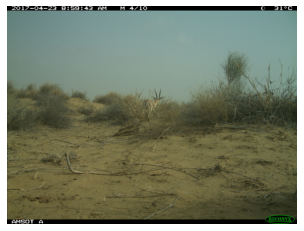

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = "/content/drive/MyDrive/DNP_Dataset/test/Not_Blank/IMG_0664 (3).JPG"
plt.imshow(mpimg.imread(image))
plt.axis("off")

In [ ]:
df.head()

,Filepath,True_Label,Pred_Label
0,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
1,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
2,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
3,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0
4,/content/drive/MyDrive/DNP_Dataset/test/Blank/...,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred=int_pred_classes,
                       y_true = y_labels))

[[1282  143]
 [  36  518]]


In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if len(classes) > 0:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Blank vs Not_Blank Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Set Font Size
  ax.title.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

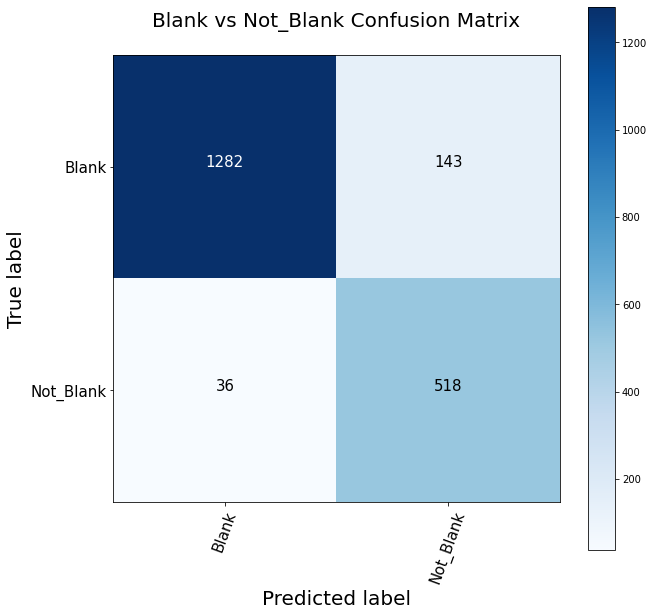

In [ ]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = int_pred_classes,
                      classes = class_names)

In [ ]:
def copy_image(image_path, destination_folder):
  shutil.copy(image_path, destination_folder)

def rename_image(old_name, new_name):
  os.rename(old_name, new_name)

def rename_and_shift_wrong_preds(df, destination_folder):
  length = len(df)
  for i in range(length):
    if(df["True_Label"][i] != df["Pred_Label"][i]):
      file_path = df["Filepath"][i]
      copy_image(image_path=file_path,
                destination_folder=destination_folder)
      img_name = (df["Filepath"][i]).split("/")[-1]
      new_path = destination_folder + "/" + img_name
      pred_label = df["Pred_Label"][i]
      true_label = df["True_Label"][i]
      final_name = f"Pred[{pred_label}]_True[{true_label}]_{img_name}"
      final_path = destination_folder + "/" + final_name + ".jpg"
      print(f"Copying {img_name} to destination folder and Renaming it to {final_name}")
      rename_image(old_name=new_path,
                   new_name=final_path)


In [ ]:
dest_folder = "/content/drive/MyDrive/Renamed_Wrong_Preds"
rename_and_shift_wrong_preds(df, dest_folder)

In [ ]:
len(os.listdir("/content/drive/MyDrive/Renamed_Wrong_Preds"))

179

In [ ]:
import tensorflow as tf

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size = (600, 600),
                                                                 batch_size = 32,
                                                                 label_mode = "binary")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=(600, 600),
                                                                batch_size = 32,
                                                                label_mode = "binary",
                                                                shuffle = False)


Found 5527 files belonging to 2 classes.
Found 1979 files belonging to 2 classes.


In [ ]:
loaded_transfer_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/DNP_Dataset/EffNetB7_5000_images_model_checkpoints_weights/checkpoint.ckpt")

In [ ]:
loaded_transfer_model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 600, 600, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 Global_Average_Pooling (Glo  (None, 2560)             0         
 balAveragePooling2D)                                            
                                                                 
 Output_Layer (Dense)        (None, 1)                 2561      
                                                                 
Total params: 64,100,248
Trainable params: 2,561
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 600, 600, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
loaded_transfer_model_1.evaluate(test_data)

62/62 [==============================] - 413s 6s/step - loss: 0.1623 - accuracy: 0.9070


[0.1622789055109024, 0.9070237278938293]